In [2]:
library(flowCore)
library(stringr)
library(CytoNorm)
library(stringr)
library(Rtsne)
library(corrplot)
library(cluster)

In [4]:
library(Biobase)
library(FlowSOM)
library( "gplots" )
library( "RColorBrewer" )

In [5]:
rom <- list.files(path = "C:/Users/oaona/output/'c15_beta.2_gamma10.0_delta.05_cytof_mlp'/calibrated_data_org_scale/batch_corrected", full.names = TRUE)
#rom


In [6]:
length<- c()
for (xyz in rom)
    {yz<- read.csv(xyz, header=FALSE)
    #kkk<- paste(xyz, dim(exprs(yz))[1], "")
    kkk<- dim(yz)[1]
     length<- append(length, kkk)}
pp<- cumsum(length)
qq<- pp
qq<- R.utils::insert(qq, 1, 1)
qq[1]<- 0

In [7]:
qq

[1]       0   67443  112009  162165  250045  296390  341807  370685  376992
[10]  445420  566129  711365  865183  898632  926391  944819  977352 1011623
[19] 1020293 1028649 1033205 1049414 1072737 1074371 1140951 1145180 1336516
[28] 1607476 1654361 1658093 1709321 1719899 1747180

In [33]:
##########
frame_new1<- c()
for (i in frame)
    {
    new= gsub(".*_","",i)
    frame_new1<- append(frame_new1, new)
    
    
   }

##############

In [8]:
BB<- read.FCS('C:/Users/oaona/OneDrive/Desktop/3622/Batch_1_anchorstimnew.fcs')
frame<- data.frame(exprs(BB))
#frame<- colnames(frame)
frame<- frame[FALSE, ]

In [9]:
concatBBT<-c()
for (jj in rom)
    {BB<- read.csv(jj, header=FALSE)
    BBT<- data.frame(BB)
    frame<- rbind(frame, BBT)}

In [10]:
head(frame)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.720515,5.091653,0.8187731,1.417230,1.617348,0.4318391,0.1069501,1.458909,0.2156489,3.601366,...,3.111599,5.297683,3.435872,3.975220,5.343028,4.732990,4.620013,5.594588,2.642312,2.785648
2,3.224918,5.042011,0.9438512,1.857299,2.620630,0.4349529,0.2350726,1.590319,0.5630247,3.880478,...,2.706725,5.559533,3.514353,2.271154,5.460328,5.396564,5.263660,6.220653,4.631720,3.566313
3,3.224821,5.051031,0.6398849,1.344177,2.822803,0.4318391,0.1163682,1.007749,0.2156489,3.519681,...,3.676486,5.400606,2.727812,3.647988,5.424318,4.991720,4.282967,5.563038,2.925079,3.622848
4,3.251661,4.931928,1.3606697,1.344177,1.903621,0.7378591,0.1069501,1.605631,0.2156489,3.366665,...,3.282933,5.040122,2.972587,3.281022,5.475883,4.281429,5.021779,5.685226,3.677922,3.515676
5,3.138238,5.023952,1.0145826,2.187875,2.343742,0.8865858,0.1141995,1.738526,0.3642047,4.073721,...,2.545289,4.428783,3.722516,2.770751,5.439720,4.968496,5.479558,6.146024,4.270580,3.501113
6,2.758031,5.107875,1.1114793,1.480878,2.535101,0.4318391,0.1069501,1.140602,0.3815935,3.550772,...,3.218415,5.465738,3.496481,4.216183,5.392500,5.701623,4.828745,5.903672,3.555259,3.536000


In [11]:
concatBBT<- frame


newBBT<- frame

library(Biobase)

meta <- data.frame(name=colnames(newBBT),
   desc=paste('this is column',colnames(newBBT),'from your CSV'))


meta$range <- apply(apply(newBBT,2,range),2,diff)
meta$minRange <- apply(newBBT,2,min)
meta$maxRange <- apply(newBBT,2,max)



ff <- new("flowFrame", exprs= data.matrix(newBBT), parameters=AnnotatedDataFrame(meta))


ff <- new("flowFrame", exprs= data.matrix(concatBBT), parameters=AnnotatedDataFrame(meta))
write.FCS(ff, paste('C:/Users/oaona/OneDrive/Desktop/JAWAD/', "concatBBT_um_vs_m", '.fcs', sep=''))


[1] "C:/Users/oaona/OneDrive/Desktop/JAWAD/concatBBT_um_vs_m.fcs"

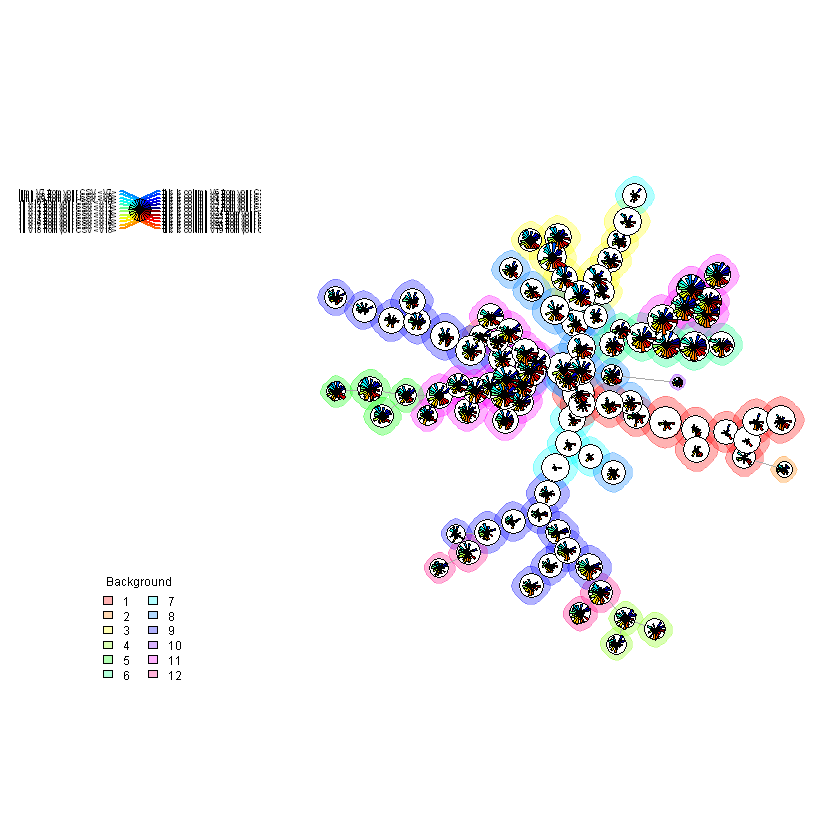

In [12]:
set.seed(45)
fSOM <- FlowSOM('C:/Users/oaona/OneDrive/Desktop/JAWAD/concatBBT_um_vs_m.fcs',
# Input options:
 compensate = FALSE, transform = FALSE,
  scale = FALSE,
 # SOM options:
 colsToUse = c(1:24), xdim = 10, ydim = 10,
 # Metaclustering options:
 nClus = 12)
#nClus = 50
PlotStars(fSOM[[1]], backgroundValues = as.factor(fSOM[[2]]))

In [13]:
#library(R.utils)
#length<- c()
#for (xyz in c(cal, cal1, cal2))
#    {#yz<- read.FCS(xyz)
    #kkk<- paste(xyz, dim(exprs(yz))[1], "")
#    kkk<- dim(xyz)[1]
#    length<- append(length, kkk)}
pp<- cumsum(length)
qq<- pp
qq<- R.utils::insert(qq, 1, 1)
qq[1]<- 0




xjx=12
yyy<- fSOM[[2]]
attributes(yyy)<- NULL
for (i in c(1:xjx))
    {assign(paste("yyy", i, sep=""), which(i == yyy))}
vv<- c()
for (x in c(1:xjx))
    {yy<- paste("yyy", x, sep="")
    vv= append(vv, yy)}

pqr<- c()
for (i in c(2:33))
    {new<- c()
    kjk<- fSOM[[1]]$map$mapping[ ,1][(qq[i-1]+1):qq[i]]
    kjk<- table(kjk)
    for (p in vv)
                 {yk<- kjk[get(p)]
            attributes(yk)<- NULL
            yk[is.na(yk)] <- 0
            yk<- sum(yk)
            new<- append(new, yk)}
    #new[is.na(new)] <- 0
    new1<- rep(c(sum(new)), times = xjx)  
    new2<- (new/new1)*100
    pqr<- rbind(pqr, new2)}  


In [14]:
pqr

new2,2.6644722,0.71616031,0.1378942,0.121584153,7.867384310,9.93876310,1.3033228,16.2136916,9.6155272,0.041516540,50.6012485,0.778435123
new2,3.3994525,0.08077907,0.9244716,0.038145672,0.148094960,5.09581295,1.3508055,2.7801463,40.2593906,12.648655926,32.6392317,0.635013239
new2,1.2839939,1.10854135,23.7837946,2.300821437,0.683866337,20.36246910,4.6794003,1.7345881,26.6727809,0.370842970,15.2304809,1.788420129
new2,5.0762403,10.85116067,1.0366409,0.228720983,1.544151115,3.57077833,1.2653619,21.5259445,5.0000000,0.143377333,48.4911243,1.266499772
new2,1.1500701,0.03883914,0.2373503,0.006473190,0.558852088,36.39227533,0.7163664,0.9731363,32.9938505,0.002157730,26.8011652,0.129463804
new2,1.6711804,0.03082546,0.3258692,9.848735055,0.435960103,8.83810027,0.7684347,5.6762886,40.5729132,0.374309179,29.3744633,2.082920492
new2,23.1802756,0.05194266,2.5174874,0.017314218,0.048479812,0.01385137,0.9799848,3.8541450,64.1387908,0.079645405,1.9634324,3.154650599
new2,14.4284129,0.34881877,3.8370065,0.031710798,0.079276994,0.07927699,4.2651023,24.8454099,11.4158871,0.015855399,40.6373870,0.015855399
new2,24.2795347,2.01817969,14.4107675,0.268895774,2.915473198,2.28853686,2.2330040,5.2770796,42.9312562,1.017127492,2.1438592,0.216285731
new2,21.0282580,0.28001226,0.2824976,0.025681598,0.473866903,0.42250371,4.2515471,37.3054205,15.0013669,0.009112825,20.6281222,0.291610402
new2,5.0614173,0.38764494,0.0778044,0.069541987,0.482662701,0.68578039,4.2014377,8.0978545,42.4419565,0.052328624,38.2274367,0.214134237


In [15]:
rowSums(pqr)

new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 
 100  100  100  100  100  100  100  100  100  100  100  100  100  100  100  100 
new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 new2 
 100  100  100  100  100  100  100  100  100  100  100  100  100  100  100  100

In [16]:
rownames(pqr)<- c(1:32)
colnames(pqr)<- LETTERS[seq( from = 1, to = 12 )]

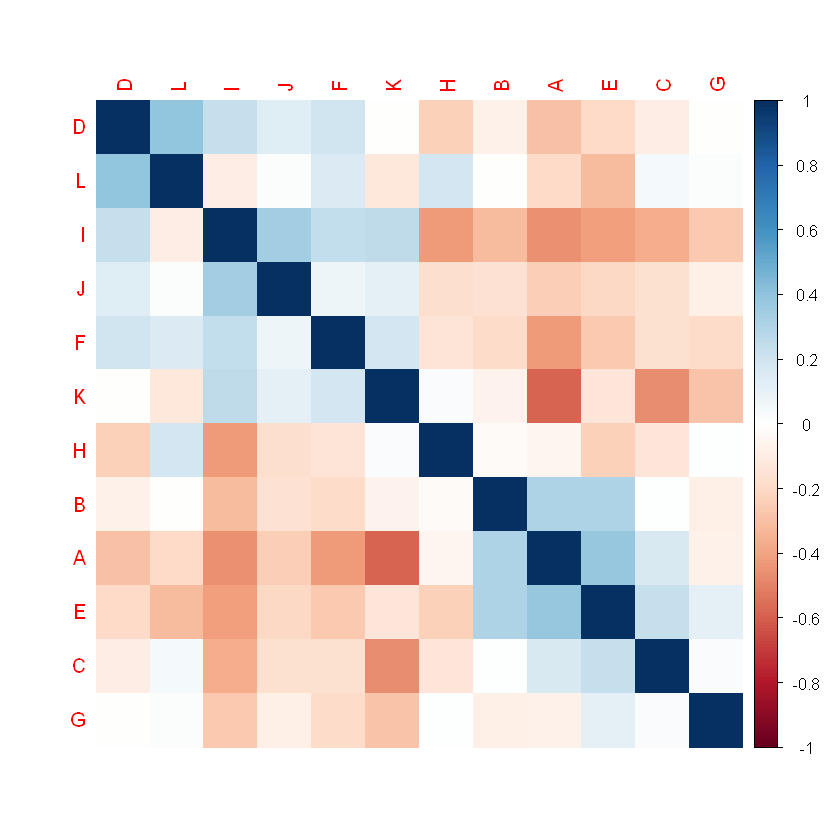

In [17]:
corrmatrix <- cor(pqr)
corrplot(corrmatrix, method = 'color', order="hclust")

In [18]:
xxx<- c()
for(klp in c(1:12))
    {wwn<- pqr[1:17, klp]
    wwp<- pqr[18:32, klp]
    xy<- t.test(wwn, wwp) 
    xxx<- append(xxx, xy[[3]])}
    

In [19]:
xxx

[1] 0.92899521 0.27406576 0.09438682 0.63482145 0.76652788 0.48490541
 [7] 0.99569820 0.11806983 0.08904920 0.33734624 0.18688354 0.03368941

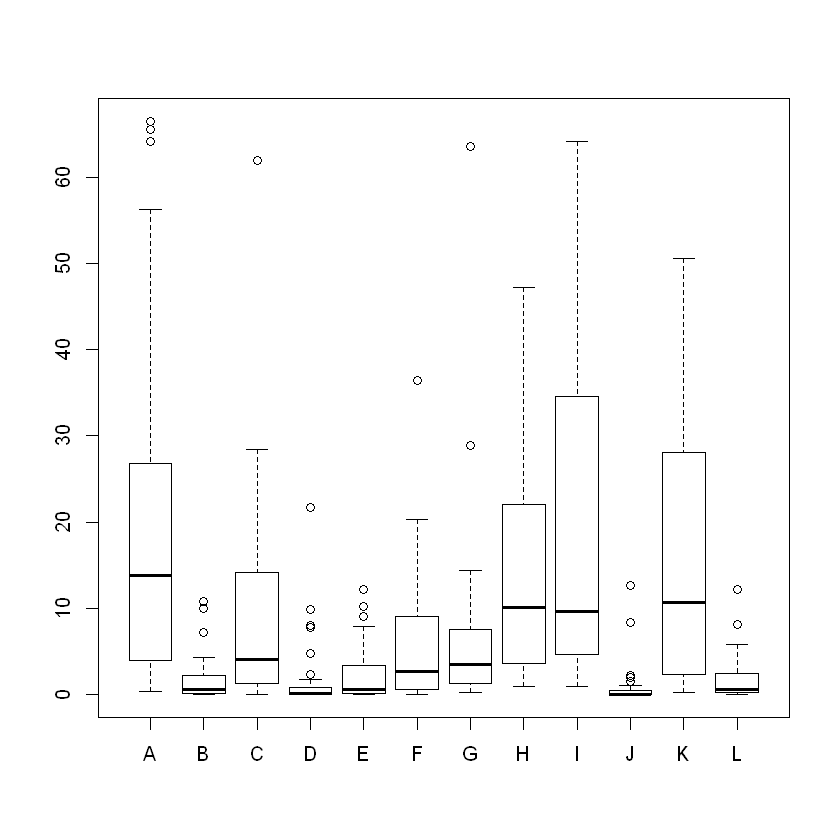

In [20]:
boxplot(pqr)

In [61]:
#optimization starts

fSOM[[2]][2]

[1] 1
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20

In [ ]:
xjx=20
yyy<- fSOM[[2]]
attributes(yyy)<- NULL
for (i in c(1:xjx))
    {assign(paste("yyy", i, sep=""), which(i == yyy))}
vv<- c()
for (x in c(1:xjx))
    {yy<- paste("yyy", x, sep="")
    vv= append(vv, yy)}













kjn<- fSOM[[1]]$map$mapping[ ,1]
meanofall<- c()
for (jj in c("yyy1", "yyy2", "yyy3", "yyy4", "yyy5", "yyy6", "yyy7", "yyy8", "yyy9", "yyy10"))
    {newBBT4b<- c() 
 for (k in get(jj))
   {i<- 0
    newBBT4<- c()
    for (j in fSOM[[1]]$map$mapping[ ,1])
     {i<- i+1
     if (j==k)
         {
         newBBT4<- rbind(newBBT4, concatBBT[i, ])
         else(next)}}
   
    
    
    
    
    
    newBBT4a<- newBBT4
   newBBT4<- data.matrix(newBBT4)
   newBBT4b<- rbind(newBBT4b, newBBT4)
    new<- c()
    ik=0
    for (ij in c(1:32))
        {ik<- ik+1
        kjk<- c()
        kjk<- c((qq[ij-1]+1):qq[ij])
        subset<- newBBT4b[rownames(newBBT4b) %in% kjk,]
        assign(paste("mean", ik, sep=""), colMeans(subset))
        new<- cbind(new, get(paste("mean", ik, sep="")))}
        }
 meanofall<- rbind(meanofall, new)}



In [32]:
kjn<- fSOM[[1]]$map$mapping[ ,1]

In [34]:
length(kjn)

[1] 1747180

In [248]:
#########
ptm <- proc.time()
patient_number=4
cluster_number=20

for (i in c(1:patient_number))
    {for (j in c(1:cluster_number))
       {assign(paste("patient_", i, "_cluster_", j, sep=""), c()
              )
    
    
    
    
      }}
#data.frame(matrix(NA, nrow=3000, ncol= 24))

####pateint
for (ij in c(2:patient_number))
    {for (jjjj in c(1:5000))
          #c((qq[ij-1]+1):qq[ij]))
         {cluster_number<- fSOM[[1]]$map$mapping[ ,1][jjjj]
          metacluster_number<- yyy[cluster_number]
          concat_value<- concatBBT[jjjj,]
          assign(paste("patient_", (ij-1), "_cluster_", metacluster_number,sep=""),
                rbind(get(eval(paste("patient_", (ij-1), "_cluster_", metacluster_number, sep=""))) , concat_value))
        
             }
             }
    
 proc.time() - ptm   
    
#rbind(get(eval(paste("patient_", (ij-1), "_cluster_", metacluster_number, sep="")))
 

   user  system elapsed 
 146.77   51.53  203.64 

In [220]:
patient_2_cluster_20

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,3.477943,5.106642,1.1826421,1.749286,2.693923,0.7766737,0.1879906,1.648187,0.4132371,4.185558,...,3.893815,5.324560,2.991380,3.915881,5.595366,5.001265,5.559353,5.729209,2.960721,3.821425
14,3.359531,5.001123,0.8422086,1.344177,2.882128,0.4318391,0.1220760,1.512389,0.3710987,3.800086,...,3.603228,5.341294,2.756925,3.696029,5.531991,5.356777,5.108297,5.794243,2.827372,3.584482
20,4.098531,5.172936,1.5200437,2.398182,3.335071,0.4318391,0.1069501,1.836509,0.6973860,4.320196,...,3.842741,5.545618,3.865310,4.021850,5.238543,5.356765,5.703651,6.089982,4.067121,3.307360
24,2.886362,5.024267,1.5203763,1.344177,2.906241,0.4318391,0.1069501,1.618133,0.3332127,4.029493,...,3.057466,5.388547,2.705370,3.931634,5.496542,5.319488,5.184933,5.756255,3.748328,3.249299
29,3.933624,5.149140,1.5752228,2.337130,3.474056,0.6429045,0.2042219,1.824938,0.6606528,4.172865,...,3.428676,5.666797,3.734106,3.420805,5.464787,5.131261,5.237466,6.000836,3.294391,3.228499
31,3.143183,5.053394,1.2935894,1.344177,2.173801,0.4805483,0.1069501,1.431195,0.2156489,3.788628,...,3.055145,5.450116,3.104459,3.388880,5.328221,4.319571,4.567395,5.733079,3.551562,3.500628
32,3.140736,5.015865,0.9818745,1.344177,3.126219,0.4318391,0.1900773,1.673276,0.8980809,4.082032,...,3.775538,5.511149,3.494180,3.101947,5.197415,5.416387,5.442097,5.921499,3.045548,3.251998
37,3.630411,5.062953,1.0650574,1.344177,2.433365,0.7068382,0.1523370,1.481939,0.2156489,3.748442,...,3.738194,5.002057,3.557534,3.284283,5.484997,5.403992,5.144288,5.953639,3.958054,3.983964
39,3.277922,5.095795,1.3711763,1.928767,2.706283,0.5493210,0.1069501,1.764587,0.4710561,4.253716,...,3.724373,5.612601,3.745507,3.815008,5.417080,5.590938,5.722031,6.164426,4.314529,3.550594


In [ ]:
#optimzation ends

In [25]:
#####fast_one

ptm <- proc.time()
patient_number=32
cluster_number=12

for (i in c(1:patient_number))
    {for (j in c(1:cluster_number))
       {assign(paste("patient_", i, "_cluster_", j, sep=""), data.frame(matrix(NA, nrow=20000, ncol= 24))

              )
    
    
    
    
      }}
#data.frame(matrix(NA, nrow=3000, ncol= 24))

####pateint
#pateint_number+1
for (ij in c(2:(patient_number+1)))
    {for (jjjj in c((qq[ij-1]+1):qq[ij]))
         {cluster_number<- fSOM[[1]]$map$mapping[ ,1][jjjj]
          metacluster_number<- yyy[cluster_number]
          concat_value<- concatBBT[jjjj,]
          for (i in c(1:24))

                        {assign(paste("patient_", (ij-1), "_cluster_", metacluster_number,sep=""),
                `[<-`(get(paste("patient_", (ij-1), "_cluster_", metacluster_number,sep="")), jjjj, i, concat_value[ ,i]))}
             }
             }
proc.time() - ptm 
    


ERROR: Error: cannot allocate vector of size 525 Kb


In [ ]:
patient_1_cluster_20<- patient_1_cluster_20[complete.cases(patient_1_cluster_20), ]
dim(patient_1_cluster_20)

In [ ]:
#####fast_one

ptm <- proc.time()
patient_number=1
cluster_number=20

for (i in c(1:patient_number))
    {for (j in c(1:cluster_number))
       {assign(paste("patient_", i, "_cluster_", j, sep=""), data.frame(matrix(NA, nrow=5000, ncol= 24))

              )
    
    
    
    
      }}
#data.frame(matrix(NA, nrow=3000, ncol= 24))

####pateint
#pateint_number+1
for (ij in c(2:(patient_number+1)))
    {for (jjjj in c(1:5000))
          #c((qq[ij-1]+1):qq[ij]))
         {cluster_number<- fSOM[[1]]$map$mapping[ ,1][jjjj]
          metacluster_number<- yyy[cluster_number]
          concat_value<- concatBBT[jjjj,]
          for (i in c(1:24))

                        {assign(paste("patient_", (ij-1), "_cluster_", metacluster_number,sep=""),
                `[<-`(get(paste("patient_", (ij-1), "_cluster_", metacluster_number,sep="")), jjjj, i, concat_value[ ,i]))}
             }
             }
proc.time() - ptm 

In [244]:
patient_1_cluster_20<- patient_1_cluster_20[complete.cases(patient_1_cluster_20), ]
dim(patient_1_cluster_20)

[1] 3449   24

In [245]:
proc.time()

     user    system   elapsed 
  5168.81   1592.21 174623.42 

In [240]:

patient_2_cluster_20<- patient_2_cluster_20[complete.cases(patient_2_cluster_20), ]
patient_2_cluster_20

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,3.477943,5.106642,1.1826421,1.749286,2.693923,0.7766737,0.1879906,1.648187,0.4132371,4.185558,...,3.893815,5.324560,2.991380,3.915881,5.595366,5.001265,5.559353,5.729209,2.960721,3.821425
14,3.359531,5.001123,0.8422086,1.344177,2.882128,0.4318391,0.1220760,1.512389,0.3710987,3.800086,...,3.603228,5.341294,2.756925,3.696029,5.531991,5.356777,5.108297,5.794243,2.827372,3.584482
20,4.098531,5.172936,1.5200437,2.398182,3.335071,0.4318391,0.1069501,1.836509,0.6973860,4.320196,...,3.842741,5.545618,3.865310,4.021850,5.238543,5.356765,5.703651,6.089982,4.067121,3.307360
24,2.886362,5.024267,1.5203763,1.344177,2.906241,0.4318391,0.1069501,1.618133,0.3332127,4.029493,...,3.057466,5.388547,2.705370,3.931634,5.496542,5.319488,5.184933,5.756255,3.748328,3.249299
29,3.933624,5.149140,1.5752228,2.337130,3.474056,0.6429045,0.2042219,1.824938,0.6606528,4.172865,...,3.428676,5.666797,3.734106,3.420805,5.464787,5.131261,5.237466,6.000836,3.294391,3.228499
31,3.143183,5.053394,1.2935894,1.344177,2.173801,0.4805483,0.1069501,1.431195,0.2156489,3.788628,...,3.055145,5.450116,3.104459,3.388880,5.328221,4.319571,4.567395,5.733079,3.551562,3.500628
32,3.140736,5.015865,0.9818745,1.344177,3.126219,0.4318391,0.1900773,1.673276,0.8980809,4.082032,...,3.775538,5.511149,3.494180,3.101947,5.197415,5.416387,5.442097,5.921499,3.045548,3.251998
37,3.630411,5.062953,1.0650574,1.344177,2.433365,0.7068382,0.1523370,1.481939,0.2156489,3.748442,...,3.738194,5.002057,3.557534,3.284283,5.484997,5.403992,5.144288,5.953639,3.958054,3.983964
39,3.277922,5.095795,1.3711763,1.928767,2.706283,0.5493210,0.1069501,1.764587,0.4710561,4.253716,...,3.724373,5.612601,3.745507,3.815008,5.417080,5.590938,5.722031,6.164426,4.314529,3.550594


In [ ]:
patient

In [229]:
x1<- data.frame(Var=1, Var2=2, Var3=3)
for (i in c(1:3))

    {`[<-.data.frame`(get(paste0("x", 1)), 1,i,concat_value[ ,i])}

In [230]:
x1

Var,Var2,Var3
<dbl>,<dbl>,<dbl>
1,2,3


In [234]:
x1<- data.frame(Var=1, Var2=2, Var3=3)
for (i in c(1:3))

    {assign(paste0("x",1), `[<-`(get(paste0("x", 1)), 1, i, concat_value[ ,i]))}

In [235]:
x1

Var,Var2,Var3
<dbl>,<dbl>,<dbl>
3.828296,5.073119,0.8636331


In [228]:
concat_value[ ,i]

[1] 0.8636331

In [184]:
vvy<- data.frame(matrix(NA, nrow=30, ncol= 3))

In [177]:
vvy= c(1,3,5)

In [191]:
'[<-'(eval(as.name("vvy")),i=5, value=data.frame(1,2,3))

ERROR: Error in parse(text = x, srcfile = src): <text>:1:28: unexpected '['
1: '[<-'(eval(as.name("vvy")),[
                               ^


In [204]:
assign("vvy", 5, pos=2)

ERROR: Error in assign("vvy", 5, pos = 2): cannot add bindings to a locked environment


In [203]:
vvy

[1] 5

In [175]:
get("vvy[1]")

[1] 5

In [208]:
datalist = list()

for (i in 1:5) {
    dat <- data.frame(x = rnorm(10), y = runif(10))
    dat$i <- i 
    datalist[[i]] <- dat }

big_data = do.call(rbind, datalist)

In [209]:
big_data

x,y,i
<dbl>,<dbl>,<int>
1.4039744447,0.773831669,1
0.2116306982,0.651177878,1
0.0006411098,0.484072793,1
-0.3179697050,0.112438754,1
0.9743692345,0.222255147,1
-1.4465862471,0.815598184,1
0.3079456057,0.324950981,1
-0.0531621253,0.262050972,1
-0.9534946081,0.442722119,1


In [205]:
data.frame(x = rnorm(10), y = runif(10))

x,y
<dbl>,<dbl>
-0.15795440,0.16279939
0.96361773,0.49206374
0.84280031,0.25127252
2.15633121,0.62473174
-1.32574326,0.40564658
-0.04539705,0.02315562
0.91547746,0.76597168
1.13424788,0.83160419
-0.83883368,0.93072979


In [207]:
datalist

ERROR: Error in eval(expr, envir, enclos): object 'datalist' not found


In [193]:
vvvv

[1] 5

In [198]:
assign(eval(paste("patient_", 1, "_cluster_", 19, "[", 1, ",", "]", sep="")),concat_value)

In [201]:
patient_1_cluster_19[1, ]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [199]:
get('patient_1_cluster_19[1,]')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,3.038919,5.087586,1.362019,1.738134,3.093064,0.902702,0.1253669,1.346374,0.3132271,4.223508,...,3.642222,5.201613,2.978417,3.644911,5.455187,4.946547,5.019992,5.900193,3.494748,3.167236


In [196]:
#patient_1_clust
paste("patient_", 1, "_cluster_", 19, "[", 1, ",", "]", sep="")

[1] "patient_1_cluster_19[1,]"

In [147]:
patient_1_cluster_19<-patient_1_cluster_19[complete.cases(patient_1_cluster_19),]

In [148]:
patient_1_cluster_19

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>


In [ ]:
 #  if (concat_num %in% seq())
         {concat_value<- concatBBT[i,]
          assign(paste("patient_", patient_num, "_cluster_", cluster_num), (append(paste("patient_", patient_num, "_cluster_", cluster_num), concat_value)))
      next    
         
     
    



kjn
concat_num=0
for (j in c(1:50))
    {concat_num<- concat_num+1
     if (concat_num %in% seq())
         {concat_value<- concatBBT[i,]
          assign(paste("patient_", patient_num, "_cluster_", cluster_num), (append(paste("patient_", patient_num, "_cluster_", cluster_num), concat_value)))
      next    
         
     }
    
    }









In [56]:
fSOM[[1]]$map$mapping[ ,1][1]

[1] 79

In [57]:
yyy10

[1] 27 33 40 84

In [ ]:
function(num)
    {
    
}

In [59]:
5==1

[1] FALSE

In [62]:
which(5 == yyy)

[1] 10 86 92 94

In [64]:
yyy[94]

[1] 5

In [250]:
N <- 10
x1 <- runif(N)
x2 <- runif(N)
d <- as.data.frame(cbind(x1, x2))


for (loop in c(1:length(d[, 1]))) {
    d$mean2[loop] <- mean(c(d[loop, 1], d[loop, 2]))
}

In [251]:
d

x1,x2,mean2
<dbl>,<dbl>,<dbl>
0.7524472,0.21343730,0.4829422
0.4187874,0.52410608,0.4714468
0.6065741,0.28952079,0.4480475
0.5117049,0.36873075,0.4402178
0.3189598,0.15634059,0.2376502
0.4107238,0.92657124,0.6686475
0.2210864,0.57332582,0.3972061
0.6638684,0.31495486,0.4894116
0.1400788,0.06643412,0.1032565


In [252]:
 apply(d, 1, mean)

[1] 0.4829422 0.4714468 0.4480475 0.4402178 0.2376502 0.6686475 0.3972061
 [8] 0.4894116 0.1032565 0.4401008